# Fractals

``` {index} Fractals
```

## Introduction
**Fractals** are never-ending, very complex patterns that are self-similar at different scales. They are created through recursion.

[<img src="https://upload.wikimedia.org/wikipedia/commons/a/a4/Mandelbrot_sequence_new.gif" style="width:300px;"/>](https://en.wikipedia.org/wiki/File:Mandelbrot_sequence_new.gif)

The name fractal has been coined in 1970s by Benoit Mandelbrot (1924 - 2010), the father of fractals. In 1982, in the book titled "The Fractal Geometry of Nature", Mandelbrot argued that most objects in nature are irregular and complicated. We do find fractal-like patterns in nature, e.g. frost crystals on the glass:

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Frost_patterns_2.jpg/800px-Frost_patterns_2.jpg" style="width:300px;"/>](https://en.wikipedia.org/wiki/File:Frost_patterns_2.jpg)

However, they are not true fractals because their scaling is finite.

In this notebook, we will discuss and construct a couple of famous fractal patterns.

## Koch curve and snowflake

One of the first described fractals was the *Koch curve/snowflake* published in 1904 paper "On a Continuous Curve Without Tangents, Constructible from Elementary Geometry" by Swedish mathematician Helge von Koch.

The Koch curve is constructed with a line segment, recursively following these steps:
1. divide line into three line segments of the same length
2. remove the middle segment
3. replace the missing segment with two sides of an equilateral triangle

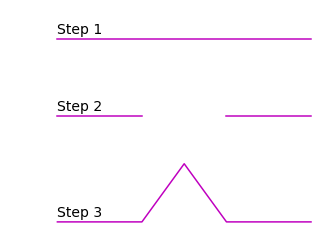

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Algorithm to create Koch curve available from
# https://stackoverflow.com/questions/932222/implementing-the-koch-curve
from koch_curve import grow

# Plot first step with grow(it), where it = 0
fig, axes = plt.subplots(3,1, figsize=(5,4), sharex=True)

koch = np.array(grow(0))
axes[0].plot(koch[:,0], koch[:,1],"m")
axes[0].axis("off")
axes[0].text(0,0.01,"Step 1", fontsize=14)

seg1 = koch[-1,0]/3.
seg2 = 2*koch[-1,0]/3.

axes[1].plot([koch[0,0],seg1], [koch[0,1],koch[0,1]],"m")
axes[1].plot([seg2, koch[1,0]], [koch[0,1],koch[0,1]],"m")
axes[1].axis("off")
axes[1].text(0,0.01,"Step 2", fontsize=14)

koch = np.array(grow(1))
axes[2].plot(koch[:,0], koch[:,1],"m")
axes[2].axis("off")
axes[2].text(0,6, "Step 3", fontsize=14)

plt.show()

When iterating multiple times over this pattern we obtain the Koch curve:

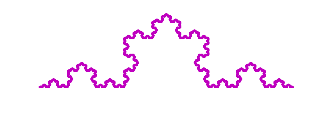

In [4]:
plt.figure(figsize=(5,4))

koch = np.array(grow(7))
plt.plot(koch[:,0], koch[:,1],"m")

plt.gca().set_aspect("equal")
plt.axis("off")
plt.show()

The Koch snowflake is comprised of three Koch curves. We can construct it by rotating original line segment twice:

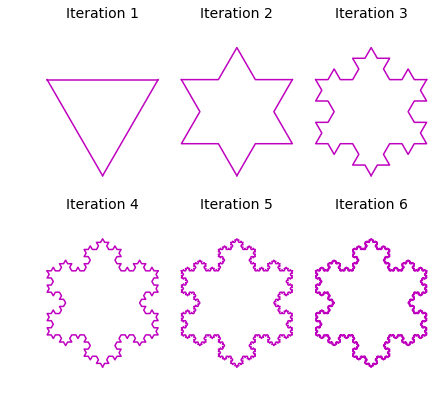

In [5]:
def rotate_coords(x, y, angle, point):
    
    x_ = x*np.cos(angle)-y*np.sin(angle)+point[0]
    y_ = y*np.cos(angle)+x*np.sin(angle)+point[1]
    
    return x_, y_


fig, axes = plt.subplots(2, 3, figsize=(7,7))

count = 0

for axis in axes:
    for ax in axis:
    
        koch = np.array(grow(count))
        ax.plot(koch[:,0], koch[:,1],"m")

        x = rotate_coords(koch[:,0], koch[:,1], np.deg2rad(240), [np.max(koch[:,0]),0])[0]
        y = rotate_coords(koch[:,0], koch[:,1], np.deg2rad(240), [np.max(koch[:,0]),0])[1]

        ax.plot(x, y, c="m")
        ax.plot(np.max(x)-x, y, c="m")

        ax.set_aspect("equal")
        ax.axis("off")
        ax.set_xlim(-10,210)
        ax.set_ylim(-200, 100)

        ax.set_title("Iteration %g" % (count+1), fontsize=14)

        count = count + 1
        
plt.subplots_adjust(hspace=0.01, wspace=0.1)
plt.show()

If we zoom in on the final iteration of the snowflake, we can see that it is comprised of the original curve, meaning it is a self-similar pattern:

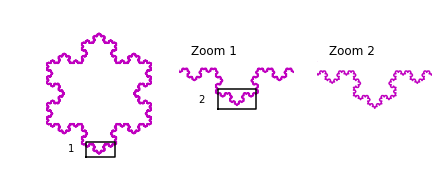

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(7,4))

koch = np.array(grow(6))

axes[0].plot(koch[:,0], koch[:,1],"m")

x = rotate_coords(koch[:,0], koch[:,1], np.deg2rad(240), [np.max(koch[:,0]),0])[0]
y = rotate_coords(koch[:,0], koch[:,1], np.deg2rad(240), [np.max(koch[:,0]),0])[1]

axes[0].plot(x, y, c="m")
axes[0].plot(np.max(x)-x, y, c="m")
axes[0].plot([75,130,130,75,75], [-180,-180,-150,-150,-180], color="black")

axes[0].set_aspect("equal")
axes[0].axis("off")
axes[0].set_xlim(-10,210)
axes[0].set_ylim(-200, 100)
#axes[0].set_title("a)")
axes[0].text(40,-170, "1")

axes[1].plot(koch[:,0], koch[:,1],"m")

axes[1].plot(x, y, c="m")
axes[1].plot(np.max(x)-x, y, c="m")

axes[1].set_aspect("equal")
axes[1].axis("off")
axes[1].set_xlim(70,130)
axes[1].set_ylim(-180, -150)
axes[1].plot([90,110,110,90,90], [-175,-175,-165,-165,-175], color="black")
axes[1].set_title("Zoom 1", ha="right")
axes[1].text(80,-172, "2")

axes[2].plot(koch[:,0], koch[:,1],"m")

axes[2].plot(x, y, c="m")
axes[2].plot(np.max(x)-x, y, c="m")

axes[2].set_aspect("equal")
axes[2].axis("off")
axes[2].set_xlim(90,110)
axes[2].set_ylim(-175, -165)
axes[2].set_title("Zoom 2", ha="right")

plt.show()

### Perimeter of the snowflake

With each iteration, the number of sides in the Koch snowflake increases four times. Therefore, the number of sides after $n$ iterations is:
$$N_n=N_{n-1}\cdot4=3\cdot4^{n}.$$

The length of each side in the snowflake increases with each iteration according to:
$$S_n =\frac{S_{n-1}}{3}=\frac{s}{3^n},$$
where $s$ is the length of the side of the original equilateral triangle.

The length of the perimeter is therefore:
$$P_n = N_n \cdot S_n = 3\cdot s\cdot \Big(\frac{4}{3}\Big)^{n}.$$

The code used for Koch curve construction calculates positions of the vertices of the curve. We can calculate, therefore, the perimeter length by summing up the lengths of vectors created by consecutive vertices in a single curve and multiplying by three to get the length of snowflake perimeter.

In [7]:
# Number of iterations
nmax = 10

# Empty array to store perimeters
# for each iteration
perimeters = np.zeros(nmax)

for j in range(nmax):
    
    # Reset sum in every simulation
    sum_ = 0
    
    # Create vertices for one curve
    koch = np.array(grow(j))
    
    for i in range(1, len(koch)):
        
        # Sum up vector lengths
        sum_ = sum_ + np.linalg.norm(koch[i]-koch[i-1])
        
    # Perimeter for three curves (snowflake)
    perimeters[j] = 3*sum_

The _perimeters_ arrays stores all perimeters for first 10 iterations. Now, we can compare the perimeters to the original length of the side of the triangle $s$:

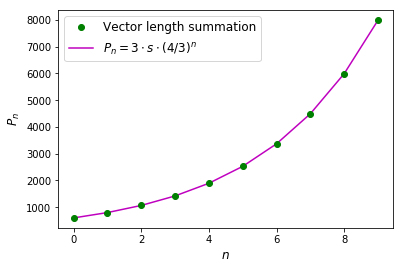

In [8]:
# Original length of the side
s = np.linalg.norm(np.array(grow(0))[1])

xlist = np.linspace(0,nmax-1,nmax)

plt.plot(xlist,perimeters, 'go', zorder=2,
        label="Vector length summation")
plt.plot(xlist, [3*s*(4./3.)**n for n in xlist],
         "m", zorder=1, label=r"$P_n=3\cdot s\cdot(4/3)^{n}$")

plt.legend(loc="best", fontsize=12)
plt.xlabel("$n$", fontsize=12)
plt.ylabel("$P_n$", fontsize=12)

plt.show()

The relationship between number of iterations and perimeter length obeys a power law and for inifinte number of iterations $$\lim_{n\rightarrow \infty}P_n=\infty.$$

### Fractal properties of the Koch curve

With the Koch curve as an example, we can define properites of fractals:
* *self-similarity* - fractal exhibits copies of itself at smaller scale.
* *classical mathematics and geometry are not applicable* - studying curves in a traditional sense (e.g. calculus) relies on well-defined tangents to curves, here we can't define them by a simple formula.
* *the size depends on the scale* - a circle of length 1 always has $2\pi$ long perimeter. However, in Koch curve we see that the perimeter increases with the number of iterations as complexity increases.
* *recursive construction* - as complicated as fractal is, its construction is very simple - one task is repeated over and over again in a recursive manner.
* *fine structure* - even if the formula is simple, the end product is extremely complicated and has detail at all scales
* *natural appearance*

## Mandelbrot set

This is one of the most famous fractals that we showed in the animation at the begining of the notebook.

Mandelbrot set, $M$, is constructed with a set of complex numbers $c$ for which the polynomial
$$P(z)=z^2+c$$
does not diverge when iterated from $z=0$ through $P(P(0))$, $P(P(P(0)))$ and so on.

We can construct it ourselves. Let's define _mandelbrot_ function first that takes inputs $z$ and complex number $c$.

In [9]:
def mandelbrot(z,c):
    return z**2+c

Now we will define $x$ and $y$ coordinates in real space, that will be used to construct complex numbers $c$:

In [10]:
n = 1001
x = np.linspace(-2.0,0.5,n)
y = np.linspace(-1.25,1.25,n)

X, Y = np.meshgrid(x,y)

# Construct complex numbers
c = X + Y*1j

The basic algorithm for creating Mandelbrot set iterates over each value of $c$. For each $c$, we iterate over $n_{max}$ and check whether the polynomial $z^{n+1}=z^n+c$ converges:

    M = # array with zeros

    for c in complex_numbers:
        z = 0 # starting z position
        for n in range(nmax):
            z = z^2 + c
            
            # Check if z values diverge
            if abs(z) > threshold:
                # Change value of M to 1 for example
                break
                
Below we present code for $n_{max}=50$ and threshold$\,=4$:

In [11]:
M = np.zeros((n,n))
nmax = 50

for i in range(len(M)):
    for j in range(len(M[i])):
        z=0j
        for k in range(nmax):
            z = mandelbrot(z, c[i,j])
            if abs(z) > 4:
                M[i,j] = 1
                break

We can plot $M$ array with _imshow_ function to reveal Mandelbrot set:

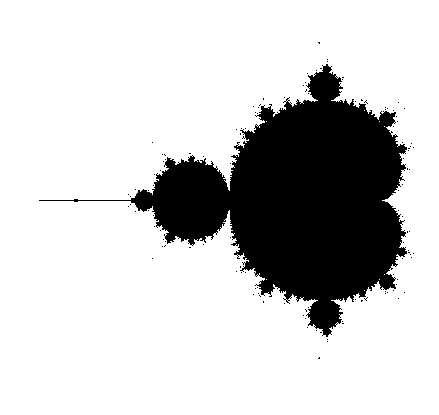

In [12]:
plt.figure(figsize=(7,7))
plt.imshow(M, cmap="binary_r")
plt.axis("off")
plt.show()

If we wanted to create a colour picture, instead of breaking the loop based on divergence threshold, we can assign values $ik$ to each non-diverging point. This value will increase by 1, each time $\text{abs}(z) < \text{threshold}$ in the loop. If the final $ik$ value is below the threshold, then we can set the value of Mandelbrot set to $ik$.

In [13]:
M = np.zeros((n,n))
nmax = 100

for i in range(len(M)):
    for j in range(len(M[i])):
        z=0j
        ik = 0
        for k in range(nmax):
            z = mandelbrot(z, c[i,j])
            if abs(z) < 50:
                ik = ik+1
            else:
                break
        if ik < 50:
            M[i,j] = ik

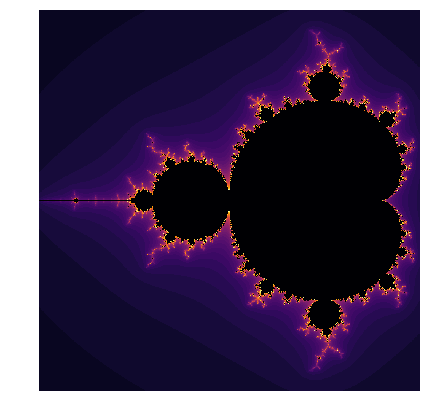

In [14]:
plt.figure(figsize=(7,7))
plt.imshow(M, cmap="inferno")
plt.axis("off")
plt.show()

We can zoom into the calculated Mandelbrot set and see beautiful patterns:

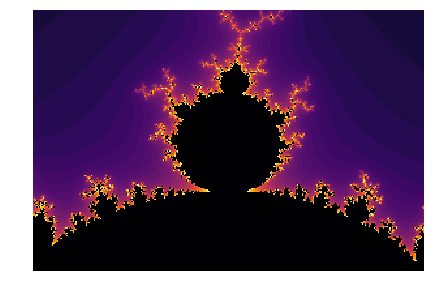

In [16]:
plt.figure(figsize=(7,7))
plt.imshow(M, cmap="inferno")

plt.xlim(600,900)
plt.ylim(700,900)
plt.axis("off")
plt.show()

We can create zoomed in versions of the Mandelbrot by choosing smaller ranges of $x$ and $y$ that create complex numbers $c$. You can play yourself with different ranges and different colourmaps! Below we show an example for:

$$x \in \langle 0.3, 0.5\rangle,\\
y \in \langle 0.1, 0.3\rangle$$

and a colourmap "prism".

In [ ]:
n = 1000
x = np.linspace(0.3,0.5,n)
y = np.linspace(0.1,0.3,n)

X, Y = np.meshgrid(x,y)

# Construct complex numbers
c = X + Y*1j

M = np.zeros((n,n))
nmax = 500

for i in range(len(M)):
    for j in range(len(M[i])):
        z=0j
        ik = 0
        for k in range(nmax):
            z = mandelbrot(z, c[i,j])
            if abs(z) < 50:
                ik = ik+1
            else:
                break
        if ik < 50:
            M[i,j] = ik

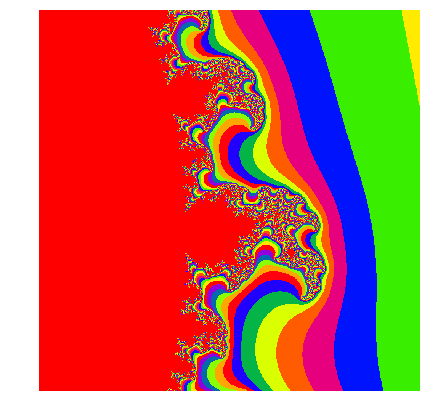

In [25]:
plt.figure(figsize=(7,7))
plt.imshow(M, cmap="prism")
plt.axis("off")
plt.show()

## References:
* Falconer, K. (2013) - Fractals: A Very Short Introduction
* Online material from Institute in Mathematics, University of Touluse.